# <font color='blue'>1. Team Details</font>

Group 0-2-6 

Areknaz Khaligian, Alejandro Torres, Chia-Yu Lin, Leon Junique, Pilar Limon Nunez, Pravat Ranjan Pasayat, Sebastian Montero

Master in Big Data and Business Analyitcs

IE University

March 2019

# <font color='blue'>2. Context</font>

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

# <font color='blue'>3. Content</font>

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv.

1. instant: Record index
2. dteday: Date
3. season: Season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr: Year (0: 2011, 1:2012)
5. mnth: Month (1 to 12)
6. hr: Hour (0 to 23)
7. holiday: weather day is holiday or not (extracted from Holiday Schedule)
8. weekday: Day of the week
9. workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit: (extracted from Freemeteo)     
    a: Clear, Few clouds, Partly cloudy, Partly cloudy         
    b: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist         
    c: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds         
    d: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog      
11. temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
12. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered

# <font color='blue'>4. Load necessary libraries</font>

This section is only dedicated to load necessary Python library that are used later in the course of this task.

In [7]:
import pandas as pd
import numpy as np

import warnings
import missingno as msno
from sklearn import preprocessing
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
import seaborn as sns

# <font color='blue'>5. Supress warnings</font>

We would also like to prevent the Warnings to populate our notebook, 
hence it is a good idea to supress the warning before we move forward.

In [8]:
# Supress warnings
warnings.filterwarnings("ignore")

# <font color='blue'>6. Read data</font>

1. The TRAIN and TEST data are both present in the file 'hour.csv'. 
2. The test set is the last quarter of the year 2012.
3. The rest of the data will be used for training.

In [12]:
# Importing data
dataset = pd.read_csv("hour.csv")

# Summary of the data
dataset.info()

# See the data
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**As most of the features/columns are looks numeric, so let's check the statitics of the columns.**

In [72]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# <font color='blue'>7. Hunting down missing values</font>

We should check if our dataset contains any missing values. So before building any predictive model, we have to clean our data by filling in all NA's or empty values with more appropriate values.

Let's analyze the NAs and empty/incorrect values present in various features.

Is there any Missing values = False


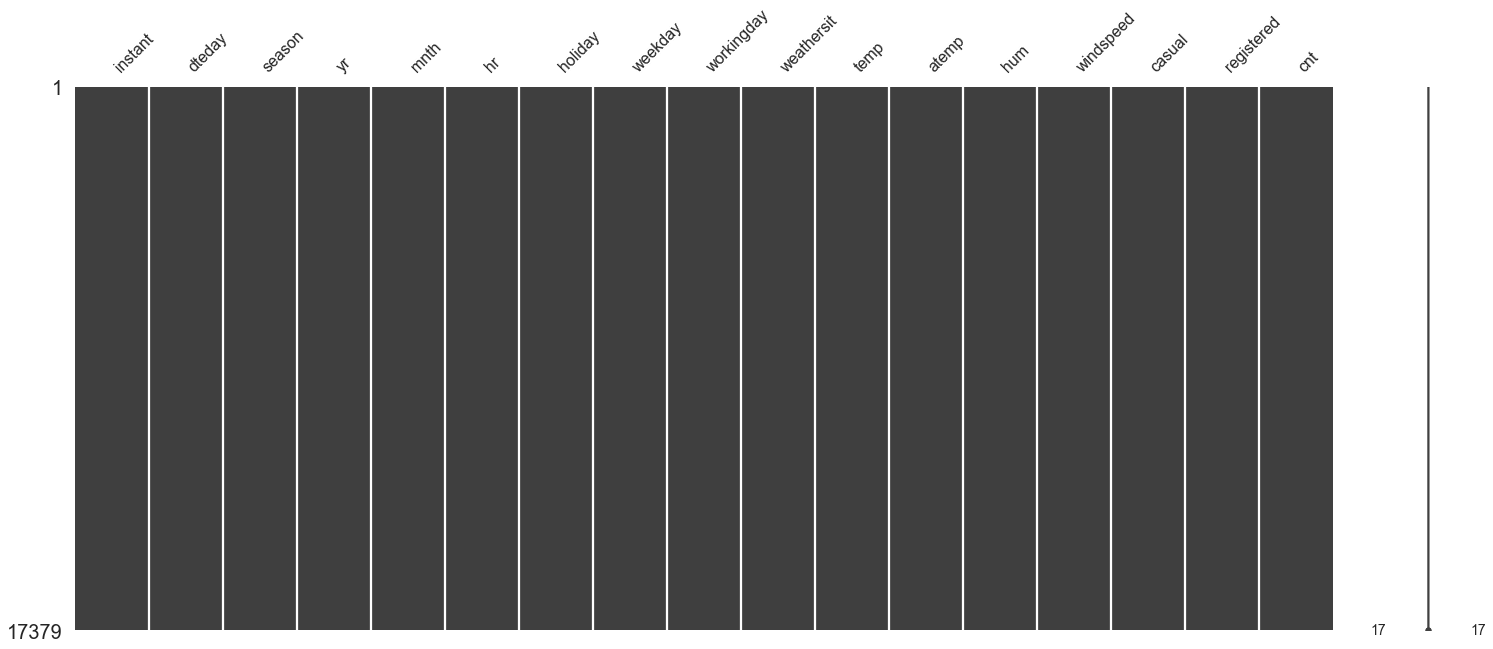

In [73]:
print("Is there any Missing values = " + str(dataset.isnull().values.any()))

# Check the completeness of the features
msno.matrix(dataset)

**Great! We have no NAs! We can proceed to the next step.**

# <font color='blue'>8. Restructuring our dataset</font>

In this section, we will restructure or correct some of the discrepancies that we see in the data.
Some of things that needs to be corrected are:

1. Renaming column to give a more logical name
2. Converting date related fields from String to Date
3. Converting features that are categorical, but are incorrectly labeled as Numeric.

In [6]:
dataset.rename?

In [74]:
# let's rename columns
dataset.rename(
    columns={
        "dteday": "date",
        "mnth": "month",
        "yr": "year",
        "hr": "hour",
        "weathersit": "weather",
    },
    inplace=True,
)

# Convert from String to Date
dataset["date"] = pd.to_datetime(dataset.date)

# Convert numerical features to Categorical
for i in [
    "month",
    "year",
    "hour",
    "season",
    "holiday",
    "weekday",
    "weather",
    "workingday",
]:
    dataset[i] = dataset[i].astype("category")

# <font color='blue'>9. Visualise data</font>

Let's visualize the data and try to see any correlations of features with the TARGET variable (No. of bikes rented i.e. 'cnt').

In [75]:
# Configuring plotting visual and sizes
sns.set_style("whitegrid")
sns.set_context("talk")
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (30, 10),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

## <font color='blue'>9.1. TARGET vs Months of different Years</font>

Let's see how the pattern of bike renting changes in different months of different years.

[Text(0.5, 1.0, 'Monthly distribution of bike renting')]

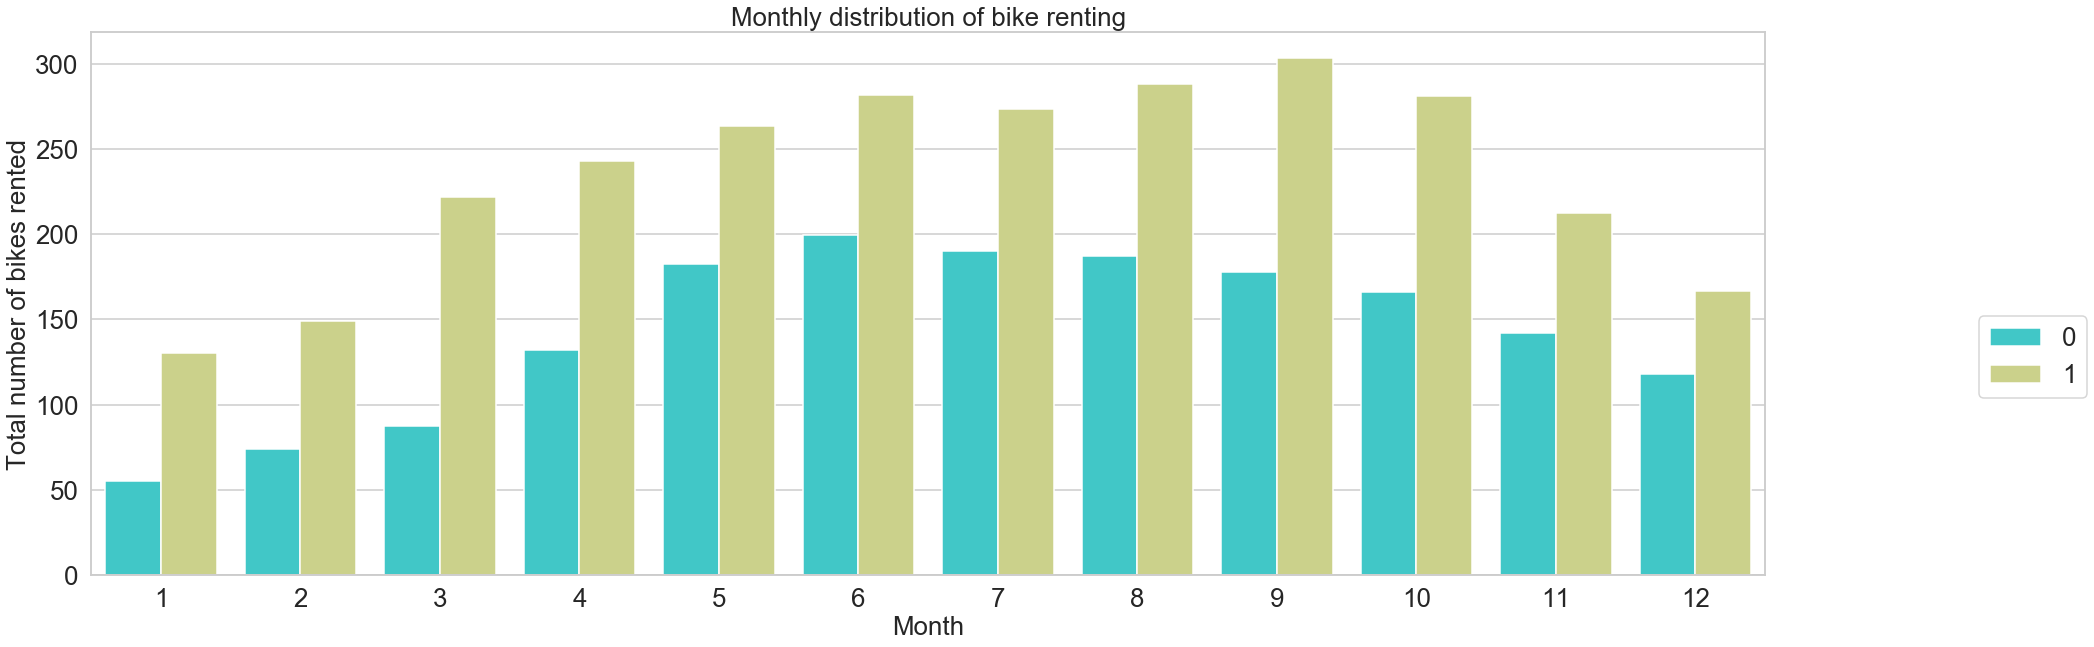

In [62]:
fig, ax = plt.subplots()
sns.barplot("month", "cnt", hue="year", data=dataset, palette="rainbow", ci=None)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Month")
plt.ylabel("Total number of bikes rented")
ax.set(title="Monthly distribution of bike renting")

Notice that months 5-10 are the most popular in both years.  This makes sense because those are the late spring, summer, and early fall months where the season is more ideal for bking.

## <font color='blue'>9.2. TARGET vs Seasons of different Years</font>

Let's see how the pattern of bike renting changes in different seasons of different years.

[Text(0.5, 1.0, 'Seasonal distribution of bike renting')]

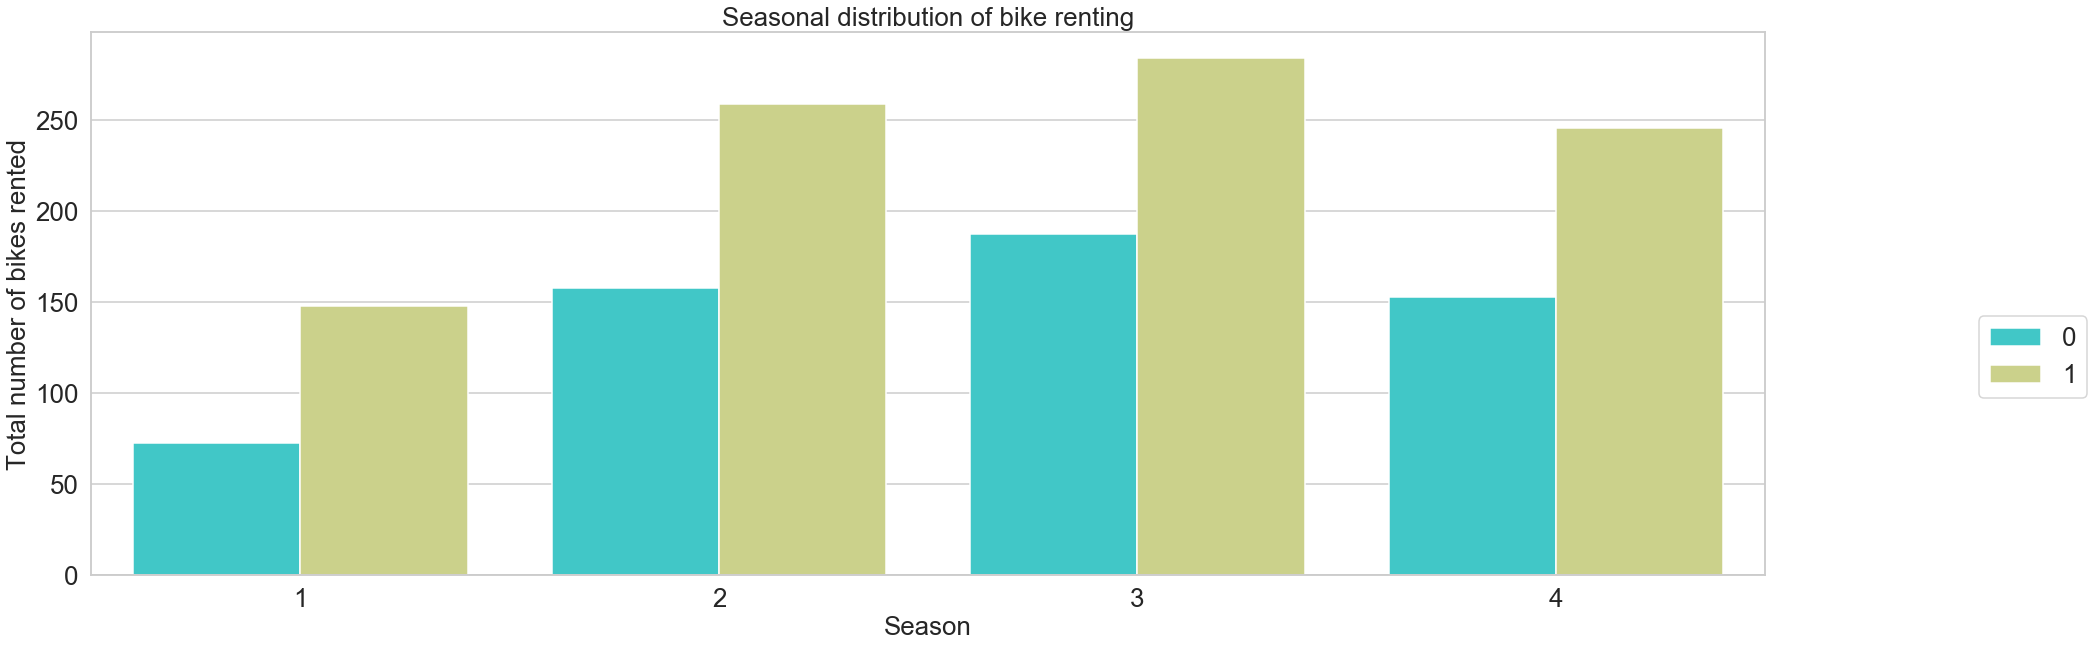

In [63]:
fig, ax = plt.subplots()
sns.barplot("season", "cnt", hue="year", data=dataset, palette="rainbow", ci=None)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Season")
plt.ylabel("Total number of bikes rented")
ax.set(title="Seasonal distribution of bike renting")

This plot is consistent with the previous one, the second and third quarter are the most popular.

## <font color='blue'>9.3. TARGET vs Week days of different Years</font>

Let's see how the pattern of bike renting changes in different weekdays of different years.

[Text(0.5, 1.0, 'Weekly distribution of bike renting')]

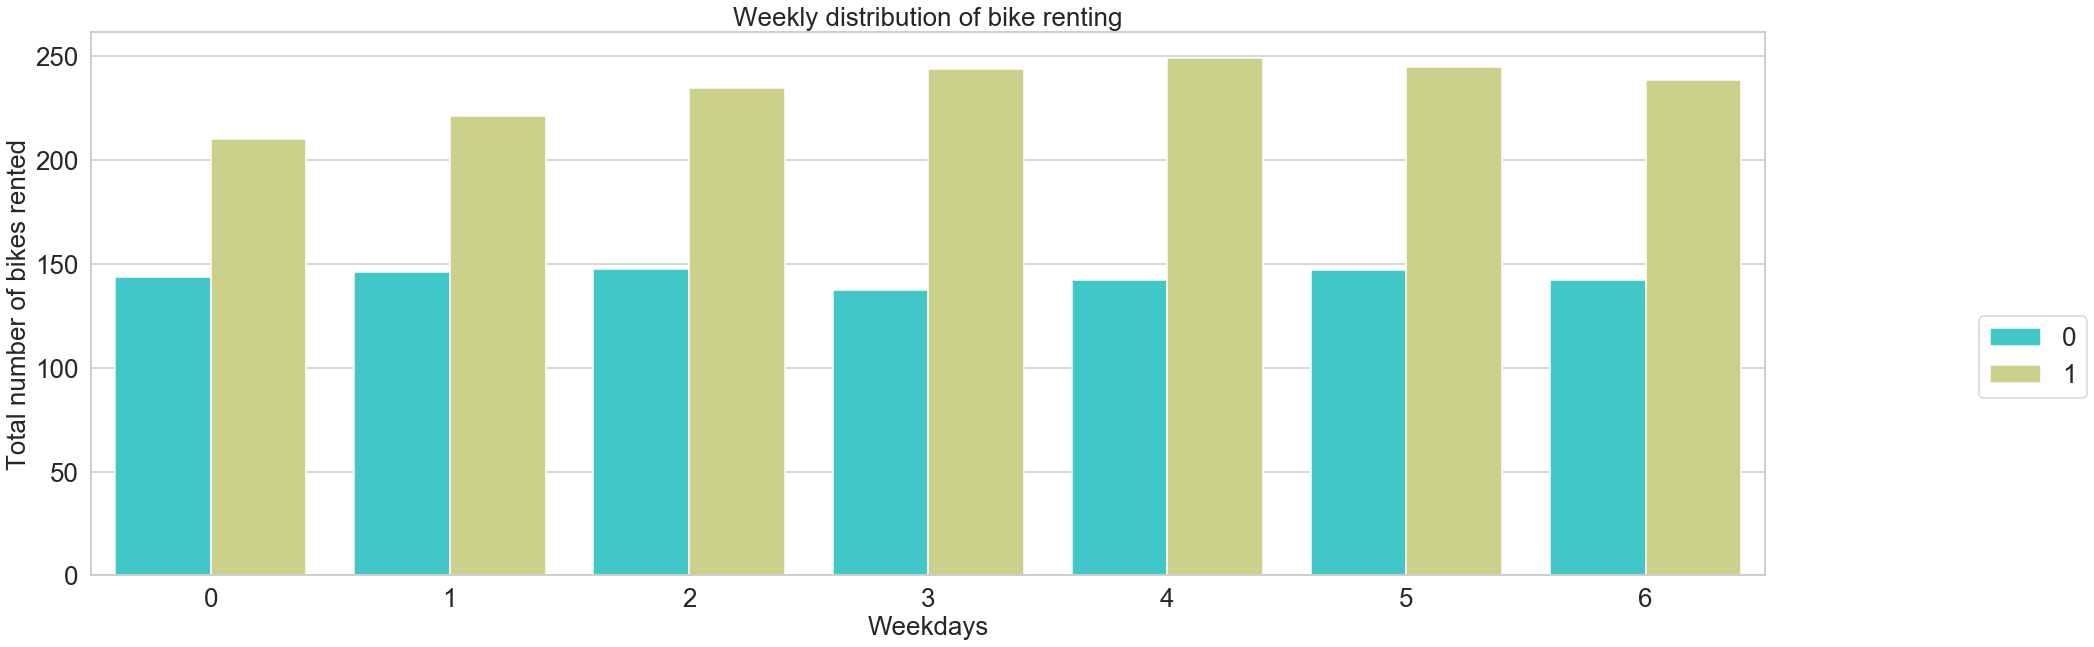

In [64]:
fig, ax = plt.subplots()
sns.barplot("weekday", "cnt", hue="year", data=dataset, palette="rainbow", ci=None)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Weekdays")
plt.ylabel("Total number of bikes rented")
ax.set(title="Weekly distribution of bike renting")

Here we can see that the weekly distribution of bike renting is simlar across all days of the week, although in 2011 there were slightly less rentals during the middle of the week, and in 2012 there were slightly more rentals during the middle of the week.

## <font color='blue'>9.4. TARGET vs Holidays of different years</font>

Let's see how the pattern of bike renting changes in holidays corresponding to different years. 

[Text(0.5, 1.0, 'Bike renting in Holidays and non-holidays')]

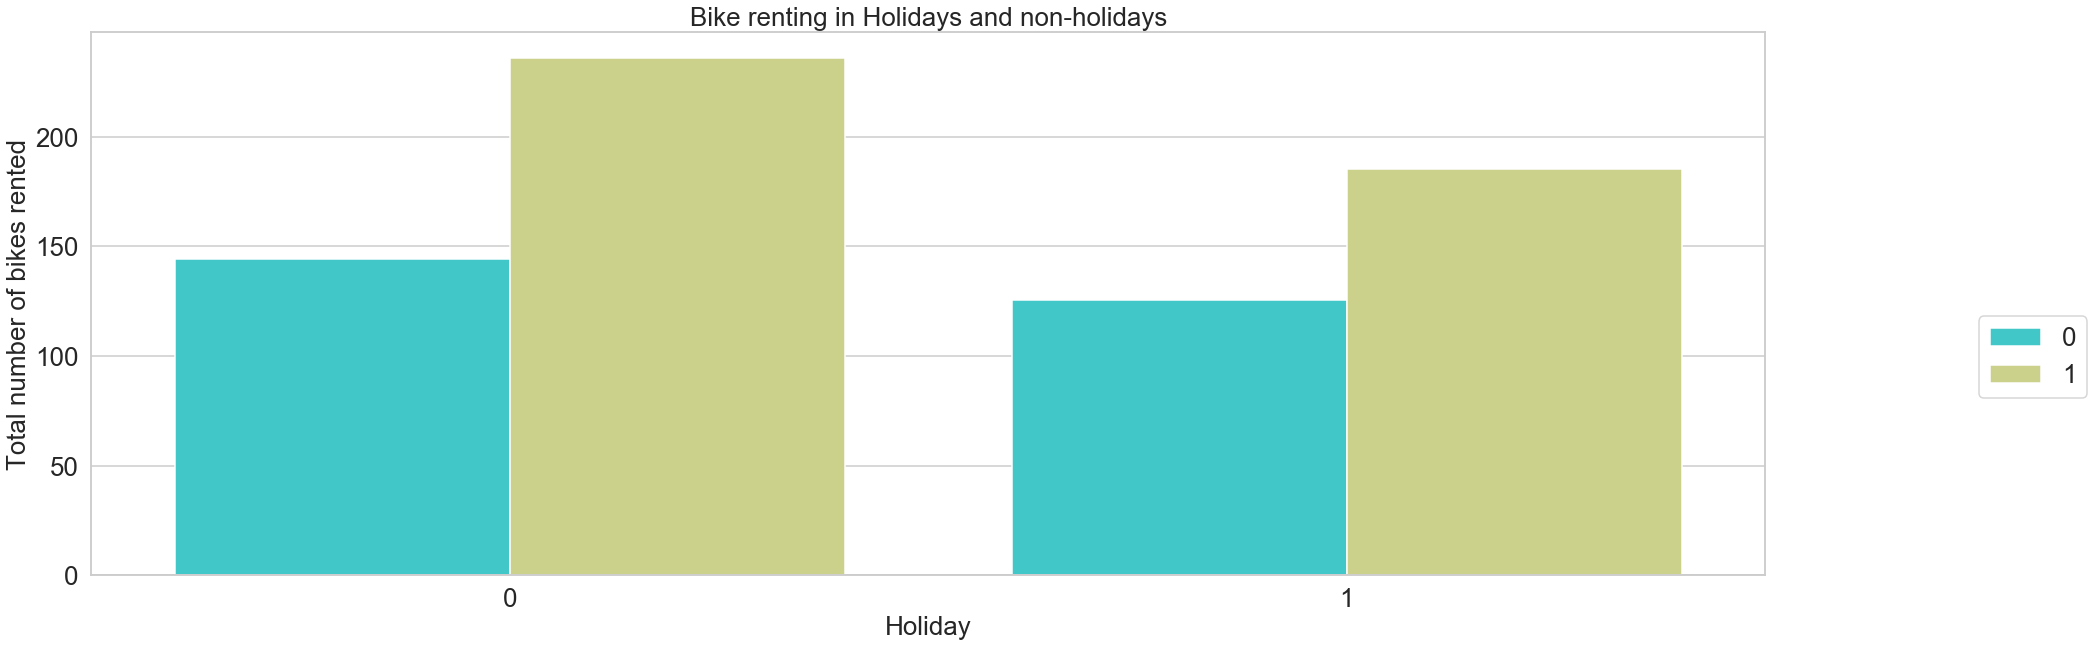

In [65]:
fig, ax = plt.subplots()
sns.barplot("holiday", "cnt", hue="year", data=dataset, palette="rainbow", ci=None)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Holiday")
plt.ylabel("Total number of bikes rented")
ax.set(title="Bike renting in Holidays and non-holidays")

Notice that bike rentals are lower on Holidays(1) than non-Holidays(0) in both years.

## <font color='blue'>9.5. TARGET vs Working day of different years</font>

Let's see how the pattern of bike renting changes in working days corresponding to different years. 

[Text(0.5, 1.0, 'Bike renting in Working days and non-working days')]

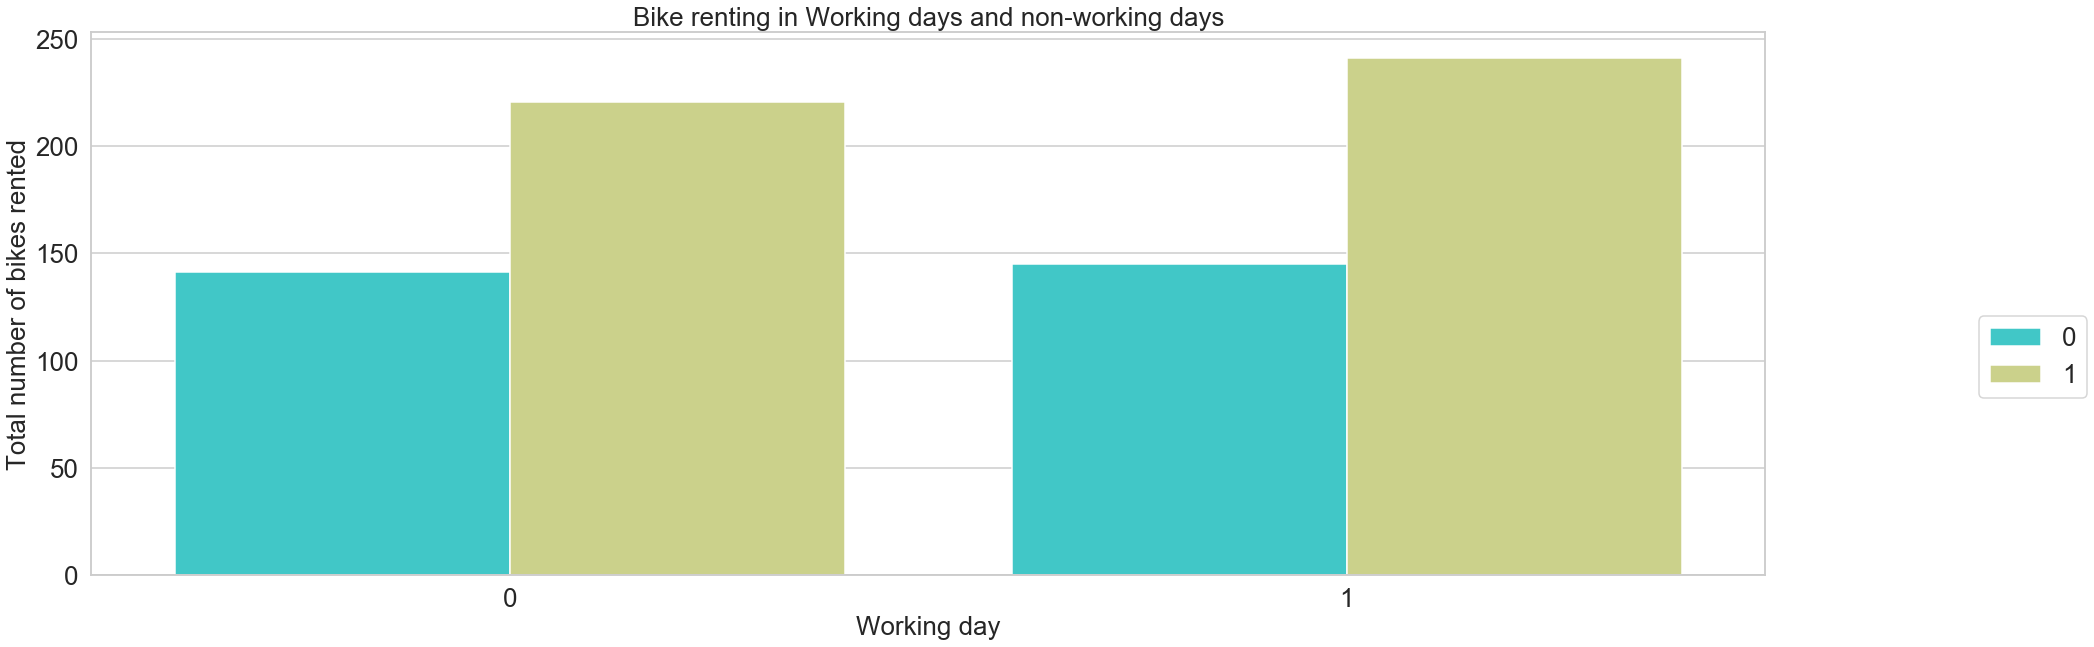

In [66]:
fig, ax = plt.subplots()
sns.barplot("workingday", "cnt", hue="year", data=dataset, palette="rainbow", ci=None)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Working day")
plt.ylabel("Total number of bikes rented")
ax.set(title="Bike renting in Working days and non-working days")

Notice that bike rentals are higher on working days (1) than non-working days (0) in both years.

## <font color='blue'>9.6. TARGET vs Weathers of different years</font>

Let's see how the pattern of bike renting changes in different weathers corresponding to different years. 

[Text(0.5, 1.0, 'Bike renting in different Weather conditions')]

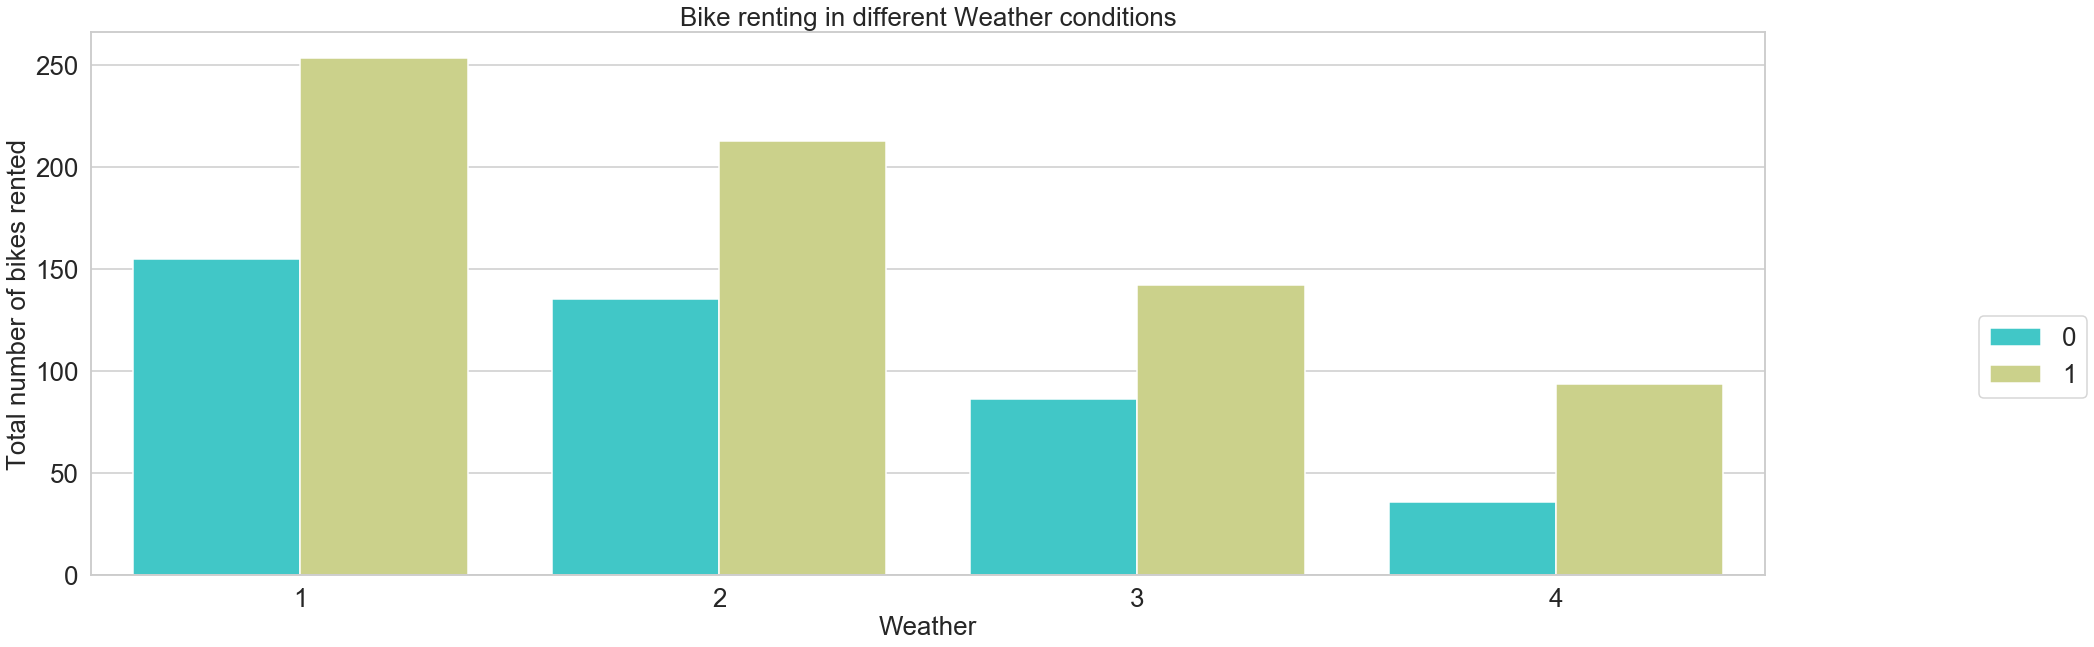

In [67]:
fig, ax = plt.subplots()
sns.barplot("weather", "cnt", hue="year", data=dataset, palette="rainbow", ci=None)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Weather")
plt.ylabel("Total number of bikes rented")
ax.set(title="Bike renting in different Weather conditions")

Here we can see that different weather conditions have an obvious effect on the numnber of bike rentals.

## <font color='blue'>9.7. TARGET vs Hours of different years</font>

Let's see how the pattern of bike renting changes in different hours corresponding to different years. 

[Text(0.5, 1.0, 'Hourly distribution bike renting by years')]

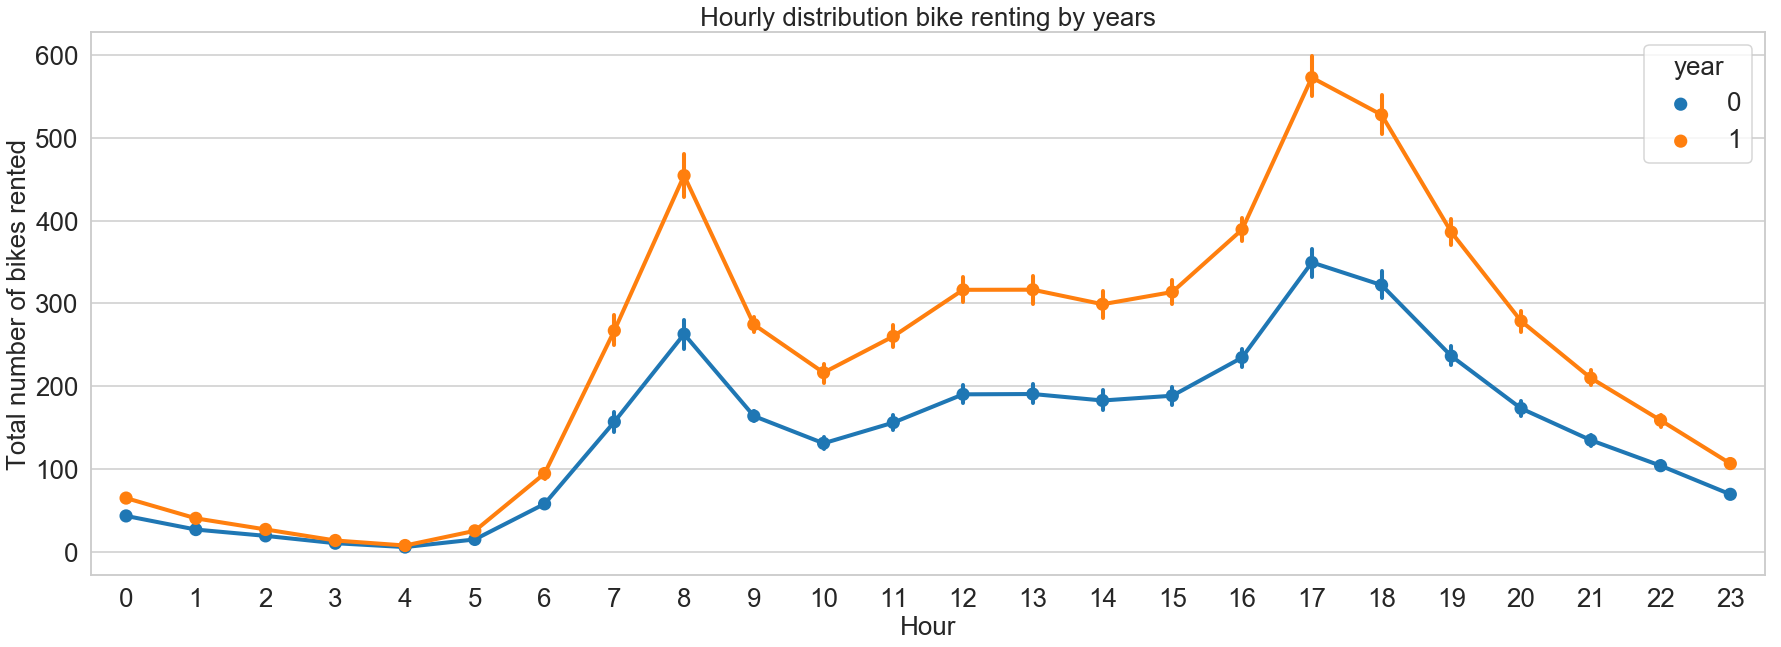

In [68]:
fig, ax = plt.subplots()

sns.pointplot(
    data=dataset[["hour", "cnt", "year"]], x="hour", y="cnt", hue="year", ax=ax
)
plt.xlabel("Hour")
plt.ylabel("Total number of bikes rented")
ax.set(title="Hourly distribution bike renting by years")

Here we see that the peak bike rentals are in the mornings and the evenings for both years.  These can be recognized as working day commute times!  If we remember that working days were the most popular for renting bikes, this makes perfect sense.  People are most often renting bikes to commute to and from work.

## <font color='blue'>9.8. TARGET vs Temperature of different years</font>

Let's see how the pattern of bike renting changes in different temperatures corresponding to different years. 

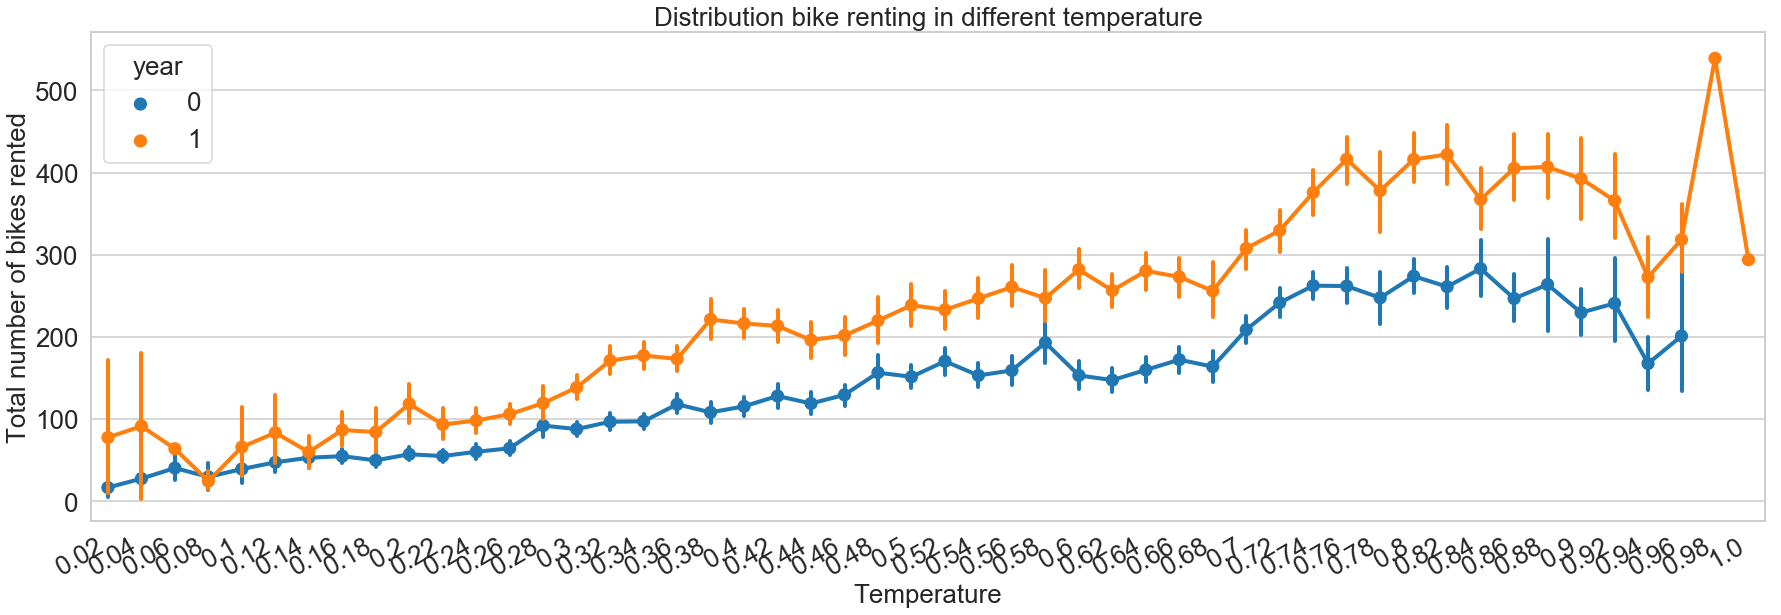

In [69]:
fig, ax = plt.subplots()
sns.pointplot(
    data=dataset[["temp", "cnt", "year"]], x="temp", y="cnt", hue="year", ax=ax
)
plt.xlabel("Temperature")
plt.ylabel("Total number of bikes rented")
ax.set(title="Distribution bike renting in different temperature")
plt.gcf().autofmt_xdate()

Notice that as temperature increases so does bike rentals until temperature passes a certain threshold, and then bike rentals decrease again.  We can interpret this to mean that people are more likely to rent bikes during mild temperatures, not too cold and not too hot.

## <font color='blue'>9.9. TARGET vs Feeling Temperature of different years</font>

Let's see how the pattern of bike renting changes in different Feeling temperatures corresponding to different years. 

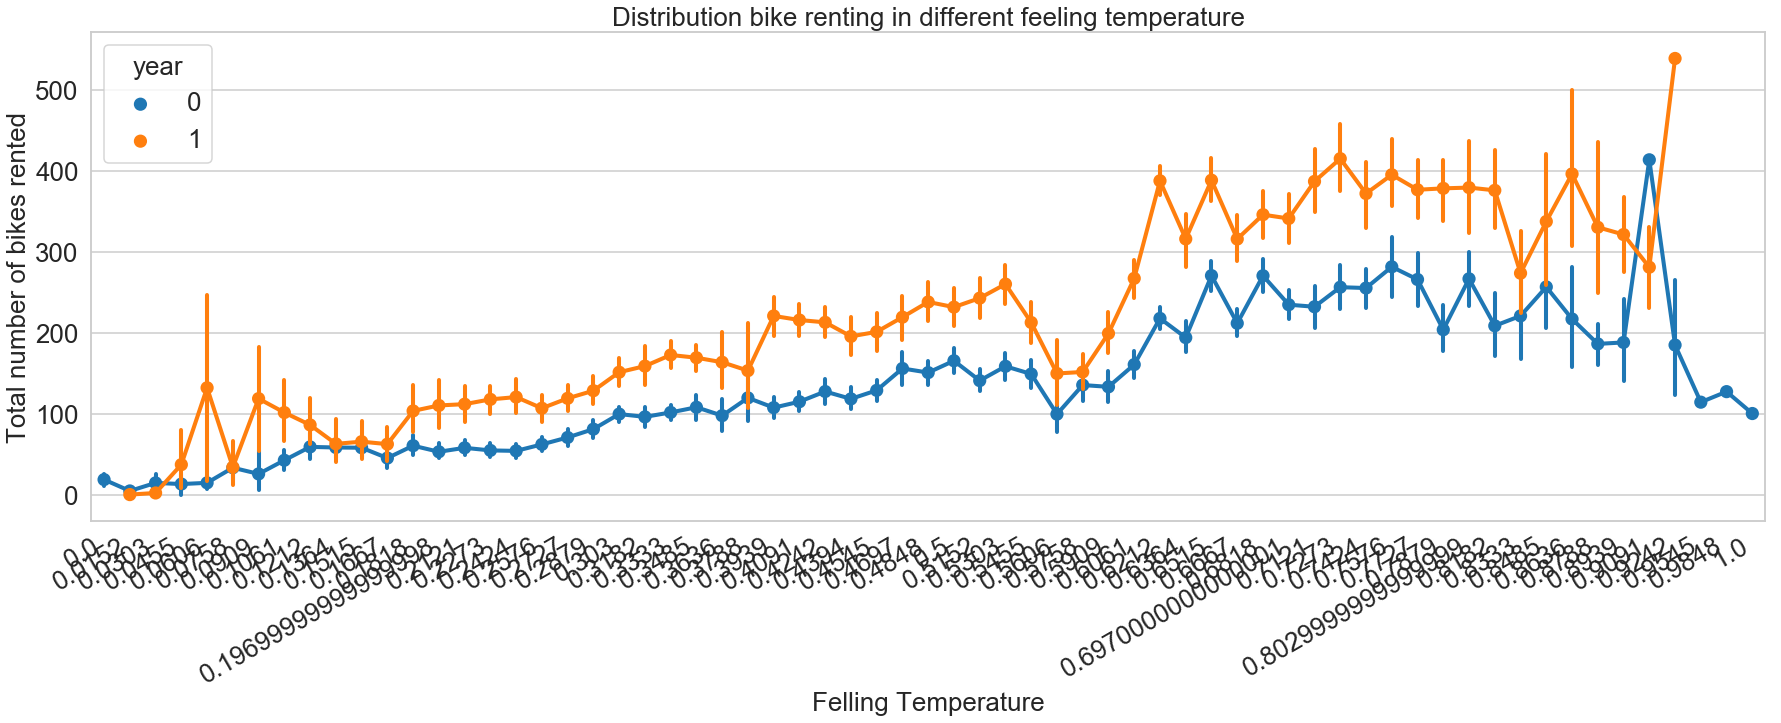

In [76]:
fig, ax = plt.subplots()
sns.pointplot(
    data=dataset[["atemp", "cnt", "year"]], x="atemp", y="cnt", hue="year", ax=ax
)
plt.xlabel("Felling Temperature")
plt.ylabel("Total number of bikes rented")
ax.set(title="Distribution bike renting in different feeling temperature")
plt.gcf().autofmt_xdate()

Once again, there is a similar trend of more bike rentals during mildly warm temperatures, but there is more variation.

## <font color='blue'>9.10. TARGET vs Humidity of different years</font>

Let's see how the pattern of bike renting changes in different Humidity corresponding to different years. 

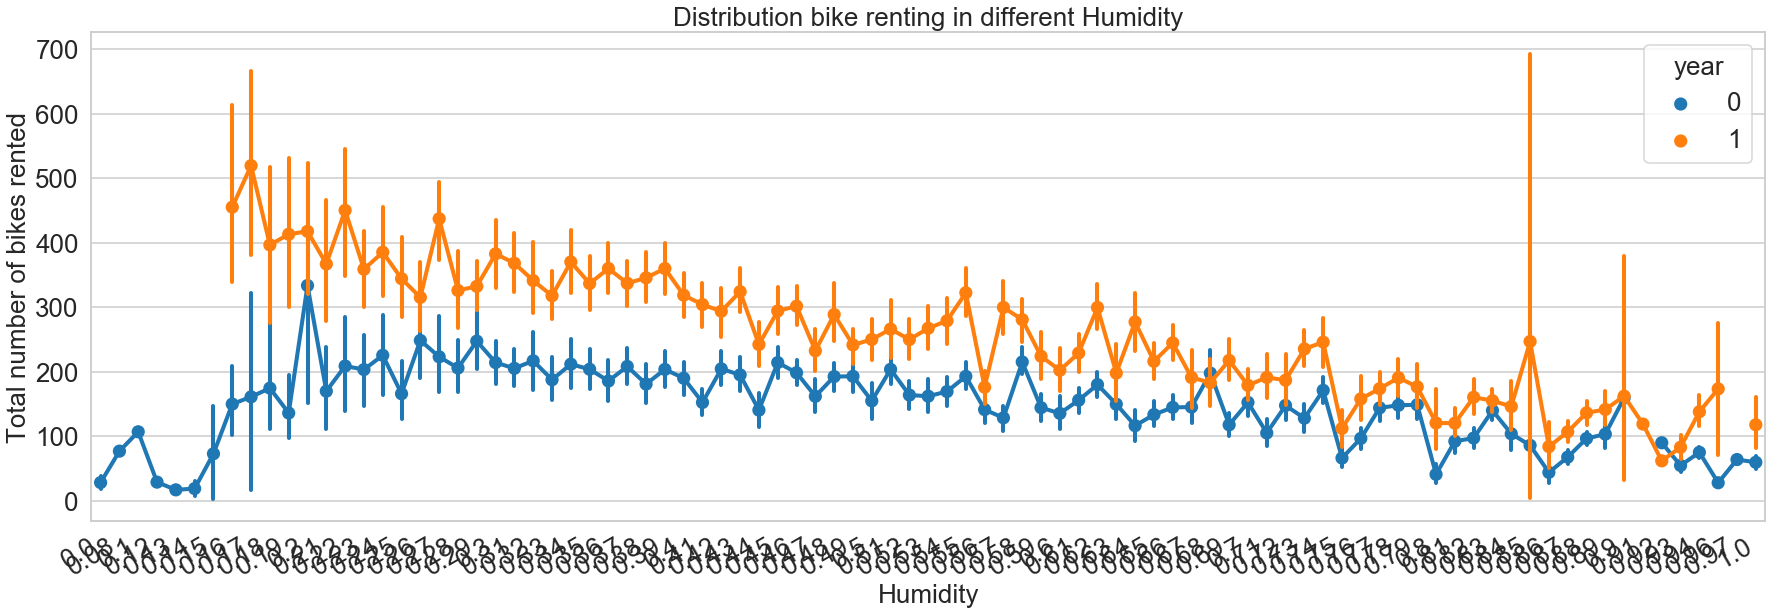

In [77]:
fig, ax = plt.subplots()
sns.pointplot(data=dataset[["hum", "cnt", "year"]], x="hum", y="cnt", hue="year", ax=ax)
plt.xlabel("Humidity")
plt.ylabel("Total number of bikes rented")
ax.set(title="Distribution bike renting in different Humidity")
plt.gcf().autofmt_xdate()

Here we see a general decrease in bike rentals as humidity increases.

## <font color='blue'>9.11. TARGET vs Wind speed of different years</font>

Let's see how the pattern of bike renting changes in different Wind speed corresponding to different years. 

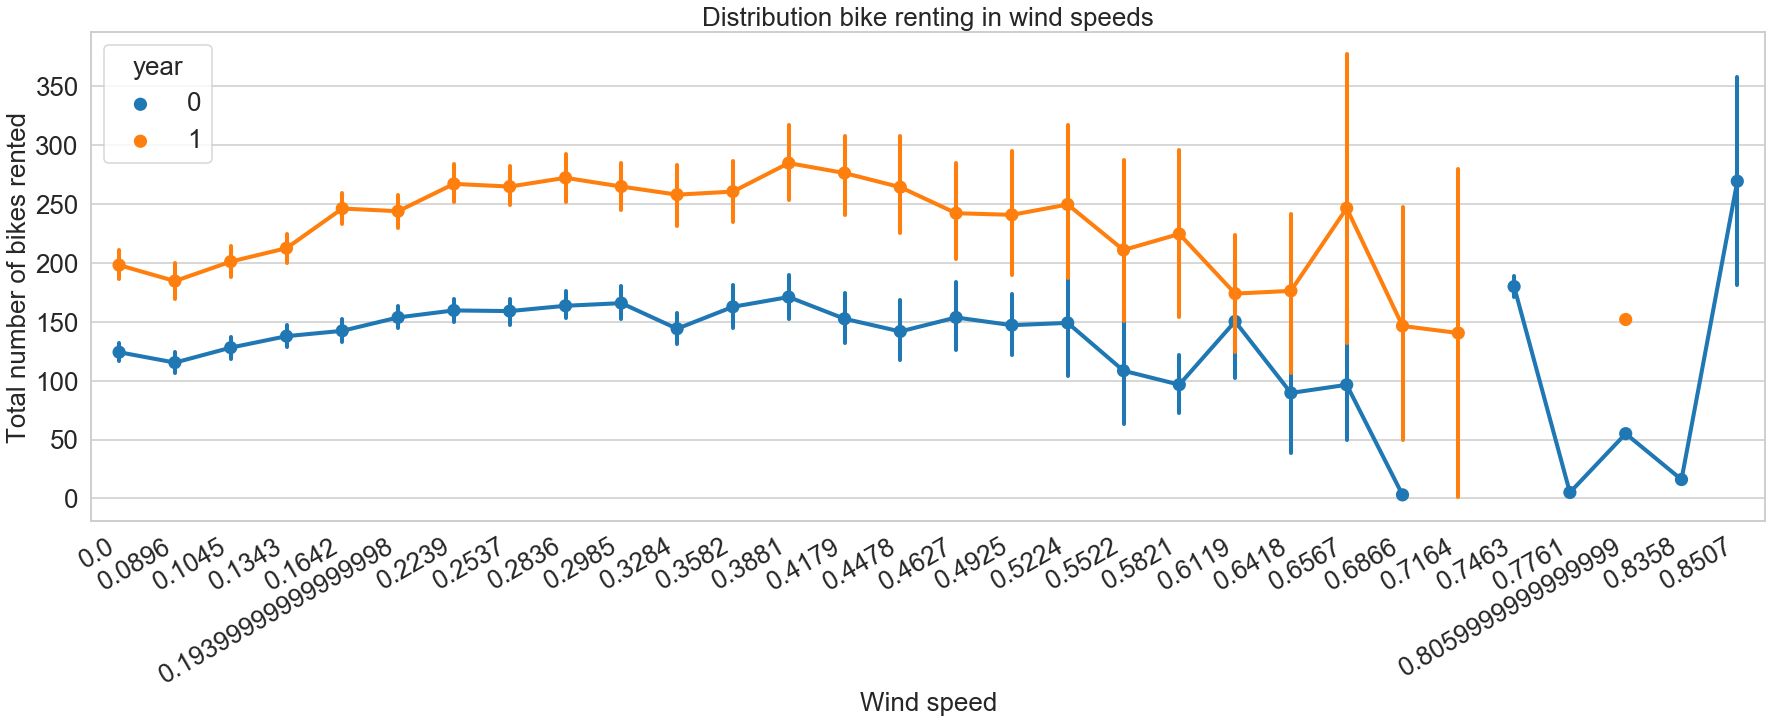

In [78]:
fig, ax = plt.subplots()
sns.pointplot(
    data=dataset[["windspeed", "cnt", "year"]],
    x="windspeed",
    y="cnt",
    hue="year",
    ax=ax,
)
plt.xlabel("Wind speed")
plt.ylabel("Total number of bikes rented")
ax.set(title="Distribution bike renting in wind speeds")
plt.gcf().autofmt_xdate()

Here we see an overall decrease in bike rentals as wind speed increases (with some outliers for very high windspeeds).  These outliers are most likely because the very high wind speeds are not very common, so there are less data points to aggregate over.

# <font color='blue'>10. Fix Skewness of features</font>

We now need to detect skewness in different features. 

While building predictive models we often see skewness in the several numerical/integer variable. Then we generally take transformations to make it more normal. We generally do it for linear models and not for tree based models, but we will follow this process irrespectively of the model used to have a standard pipeline. This actually means that our distribution of variables are not normal, we are deliberately making it normal for prediction.

For numeric feature with excessive skewness, we perform different type of skewness transformation.

**Let's find out all the numeric features**

In [10]:
dataset._get_numeric_data().columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

**We know that most of numerical features are already normalised, except Casual and registered. As we are not going to use these two features in our model buliding part, hence we decided not to scale them.**

# <font color='blue'>11. Correlation of numeric features with Target</font>

Here we will try to find 
1. The correlation of different features with Target variable.
2. The inter-correlation within different features.

## <font color='blue'>11.1. Correlation of 'Casual' and 'Registered' with Target</font>

As we have to chose between keeping the variable 'Casual' and 'Registered', so let's check their correlation with the Target variable.

Based on this, we will choose which one to keep.

In [15]:
print("Casual corr:" + str(pearsonr(dataset["casual"], dataset["cnt"])))
print("Registered corr:" + str(pearsonr(dataset["registered"], dataset["cnt"])))

Casual corr:(0.6945640779749493, 0.0)
Registered corr:(0.9721507308642992, 0.0)


**We see that 'Registered' is highly correlated with Target variable. So, later we can remove 'Casual' when we build our model** 

## <font color='blue'>11.2. Correlation of other features with Target</font>

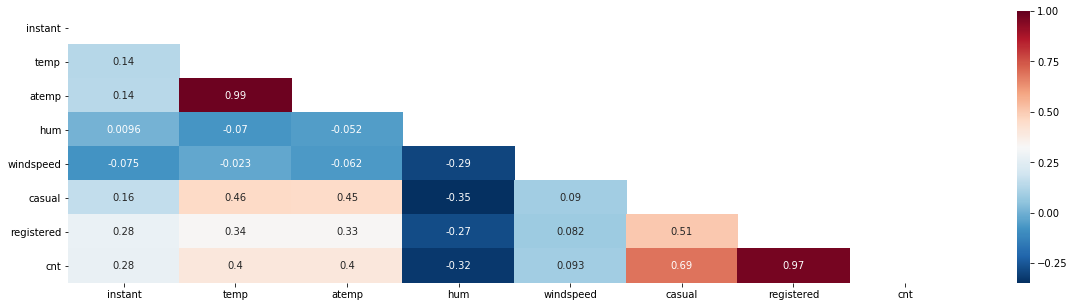

In [16]:
# Let's look at the correlation between all the variables!
plt.figure(figsize=(20, 5))
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), cmap="RdBu_r", mask=mask, annot=True)
plt.show()

**We can see that temp and atemp are very correlated!! We should only keep one.**

**Let's analyze 'temp' and 'atemp', and decide which one to keep.**

In [17]:
print(pearsonr(dataset["temp"], dataset["cnt"]))
print(pearsonr(dataset["atemp"], dataset["cnt"]))

(0.4047722757786586, 0.0)
(0.40092930412663186, 0.0)


**'temp' has a slightly higher explanatory power so let's keep that one.** 

**Let's remove the 'atemp' feature**

In [18]:
dataset = dataset.drop("atemp", 1)

# <font color='blue'>12. Remove outliers from the dataset</font>

We will now focus on numerical values. If `NAs` are the natural enemy of categorical values, the main problem with numerical values are outliers (values which largely differ from the rest). Outliers can mislead the training of our models resulting in less accurate models and ultimately worse results.

In this section we seek to identify outliers to then properly deal with them. If we summarize the dataset, we can see variables which "Max." is much larger than the rest of values. These features are susceptible of containing outliers. Nevetheless, the easiest way to detect outliers is visualizing the numerical values; for instance, by `boxploting` the column values.

## <font color='blue'>12.1 Box plots</font>

In [79]:
# Let's find out the TRAINING dataset
dataset_training = dataset[
    (dataset.year == 0)
    | (
        (dataset.year == 1)
        & ((dataset.month != 10) | (dataset.month != 11) | (dataset.month != 12))
    )
]

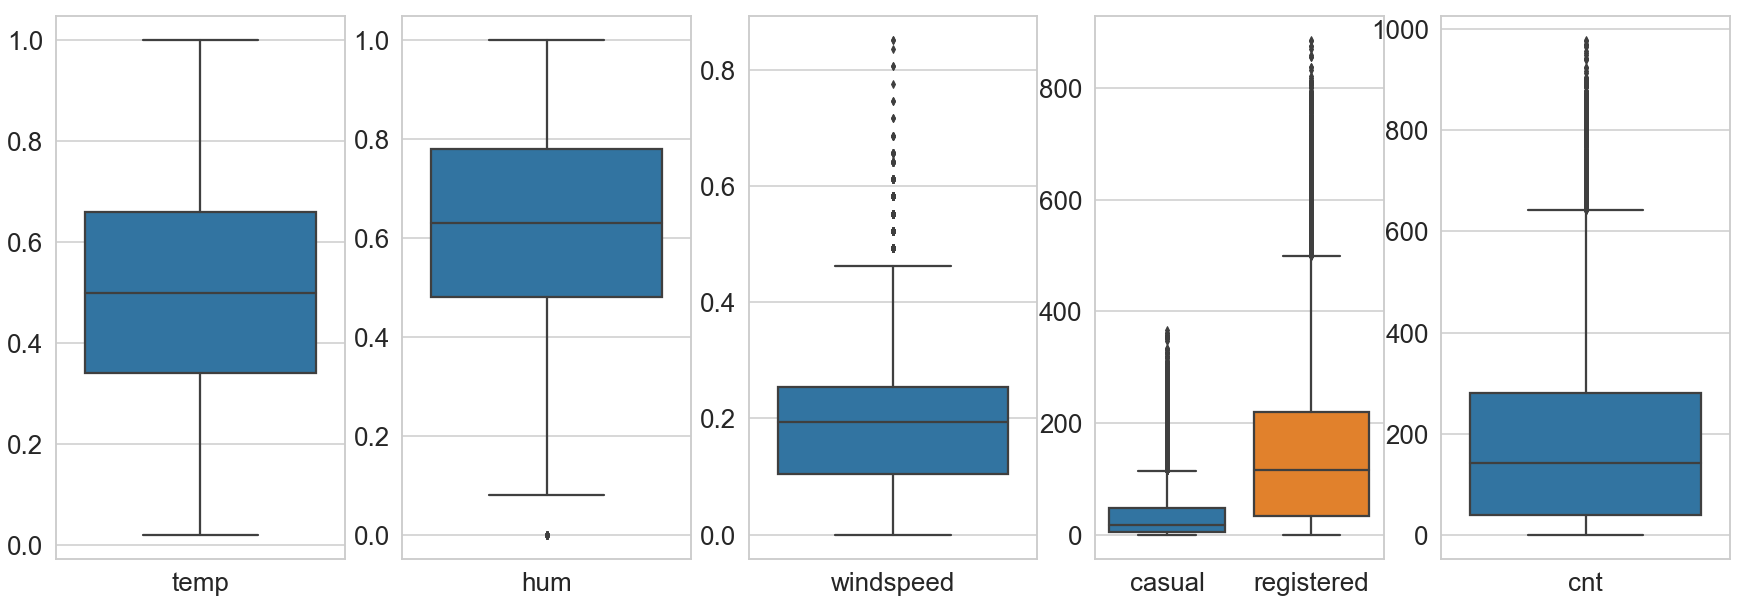

In [80]:
# Let's first check outliers using Box-plot
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)

sns.boxplot(data=dataset_training[["temp"]], ax=ax1)
sns.boxplot(data=dataset_training[["hum"]], ax=ax2)
sns.boxplot(data=dataset_training[["windspeed"]], ax=ax3)
sns.boxplot(data=dataset_training[["casual", "registered"]], ax=ax4)
sns.boxplot(data=dataset_training[["cnt"]], ax=ax5)

Notice there are outliers identified as outside 1.5 times the inner quartile range for all the features except "temp".  Before we remove these outliers, we should plot each feature against the target variable to make suer that they are truly outliers for our particular dataset.

## <font color='blue'>12.2 Scattered plots</font>

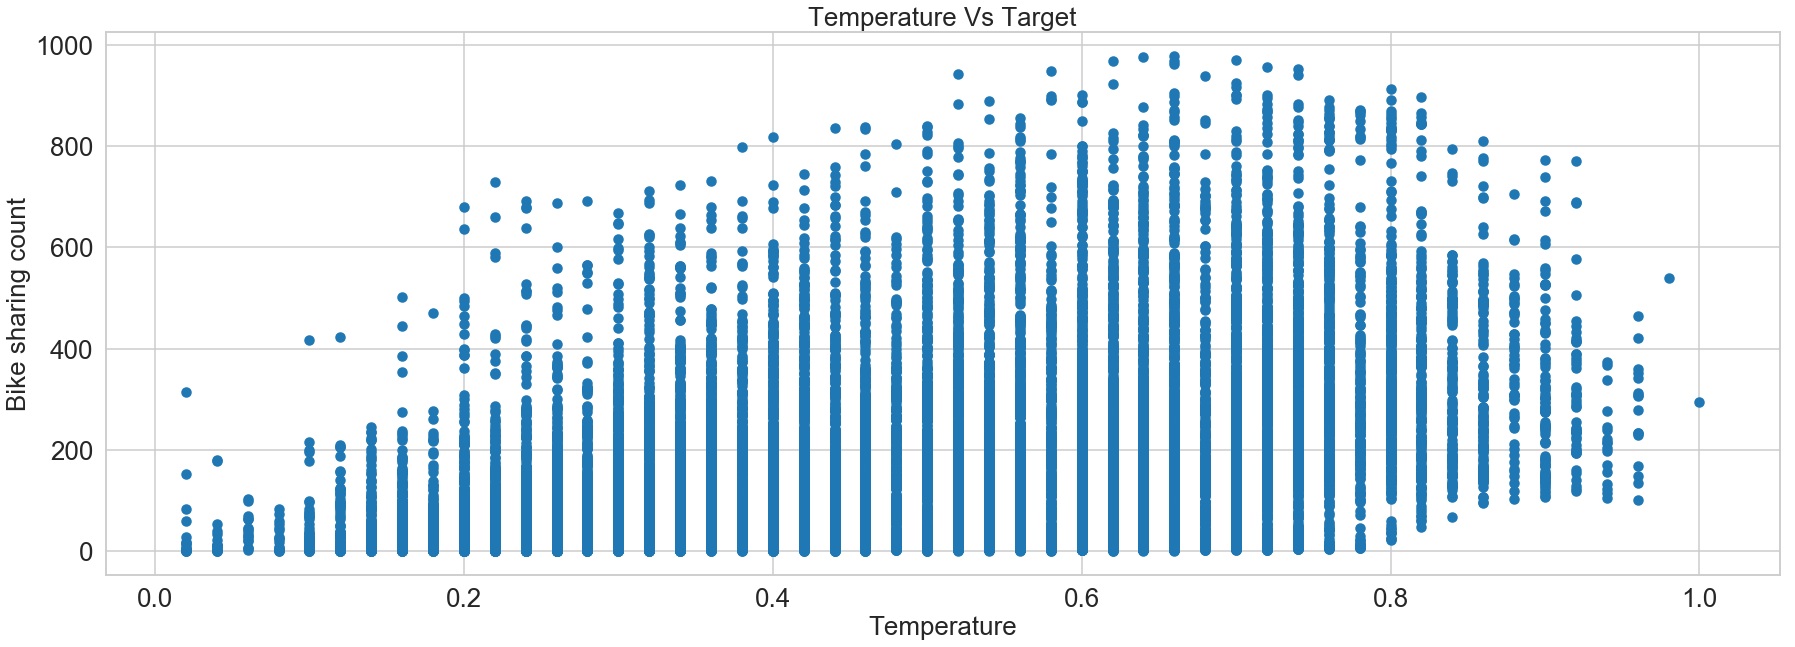

In [81]:
# Temperature vs Target
fig, ax = plt.subplots()
ax.scatter(dataset_training[["temp"]], dataset_training[["cnt"]])
plt.title("Temperature Vs Target")
ax.set_xlabel("Temperature")
ax.set_ylabel("Bike sharing count")
fig.show()

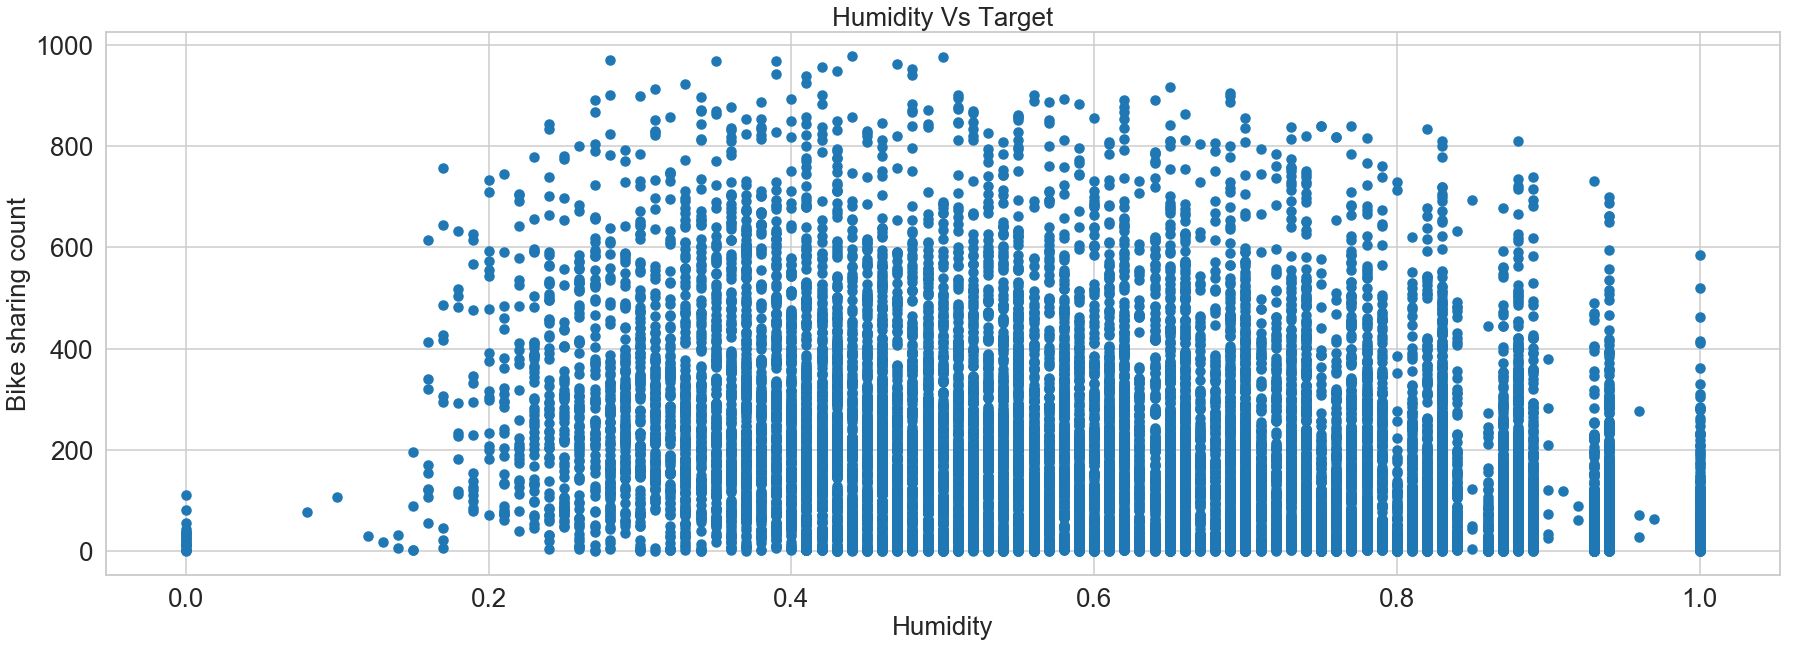

In [82]:
# Humidity vs Target
fig, ax = plt.subplots()
ax.scatter(dataset_training[["hum"]], dataset_training[["cnt"]])
plt.title("Humidity Vs Target")
ax.set_xlabel("Humidity")
ax.set_ylabel("Bike sharing count")
fig.show()

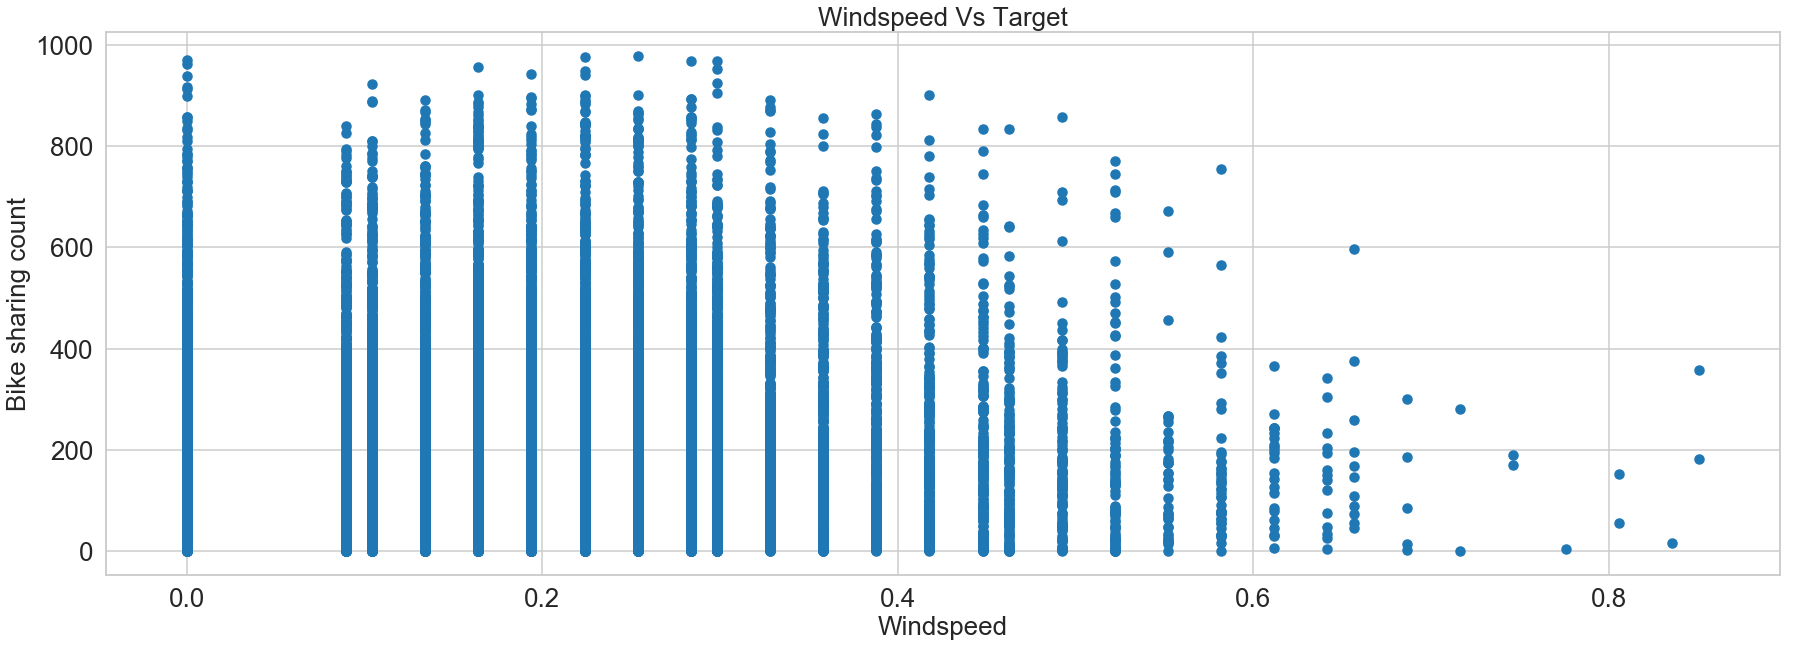

In [83]:
# Windspeed vs Target
fig, ax = plt.subplots()
ax.scatter(dataset_training[["windspeed"]], dataset_training[["cnt"]])
plt.title("Windspeed Vs Target")
ax.set_xlabel("Windspeed")
ax.set_ylabel("Bike sharing count")
fig.show()

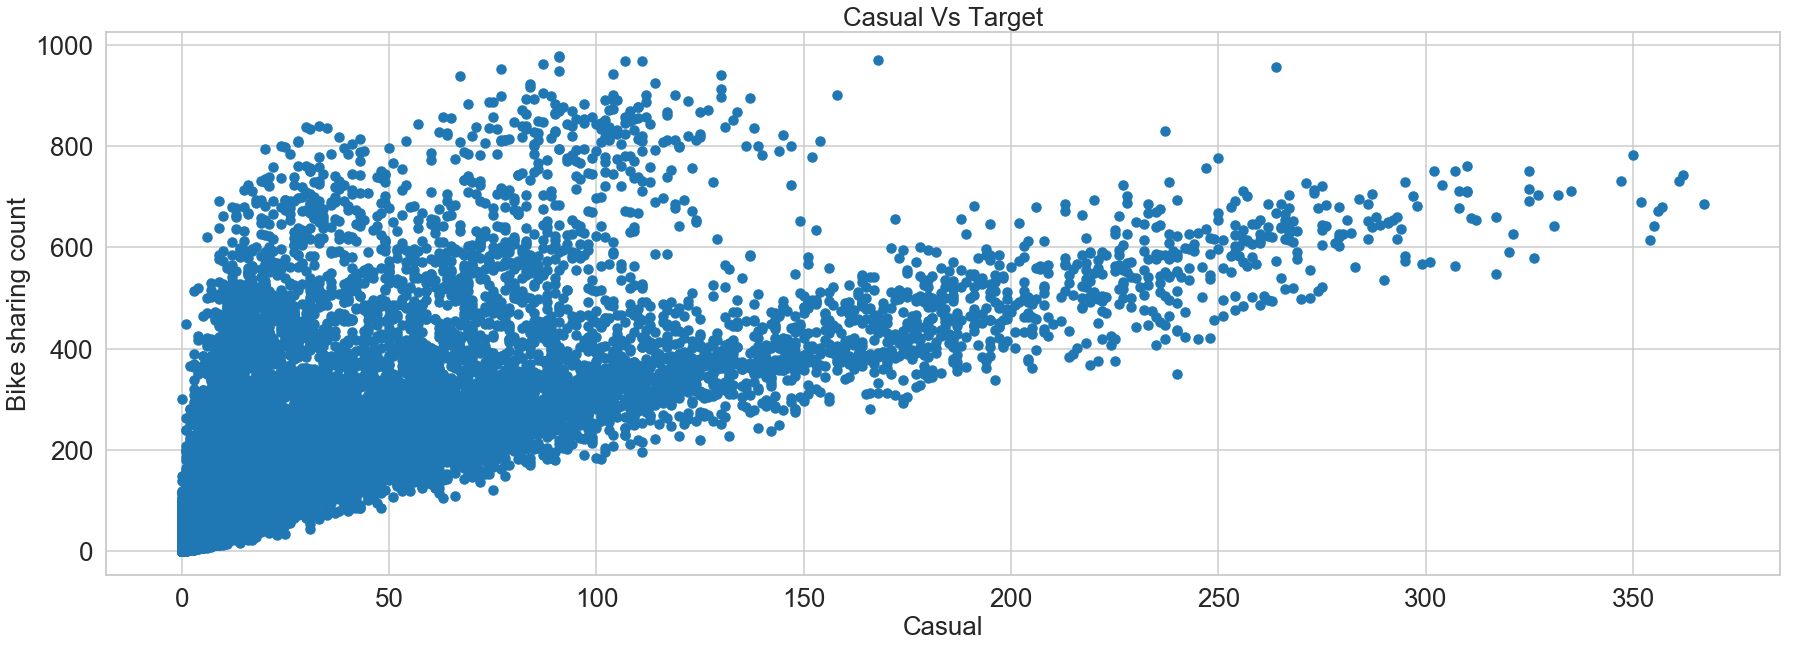

In [84]:
# Casual vs Target
fig, ax = plt.subplots()
ax.scatter(dataset_training[["casual"]], dataset_training[["cnt"]])
plt.title("Casual Vs Target")
ax.set_xlabel("Casual")
ax.set_ylabel("Bike sharing count")
fig.show()

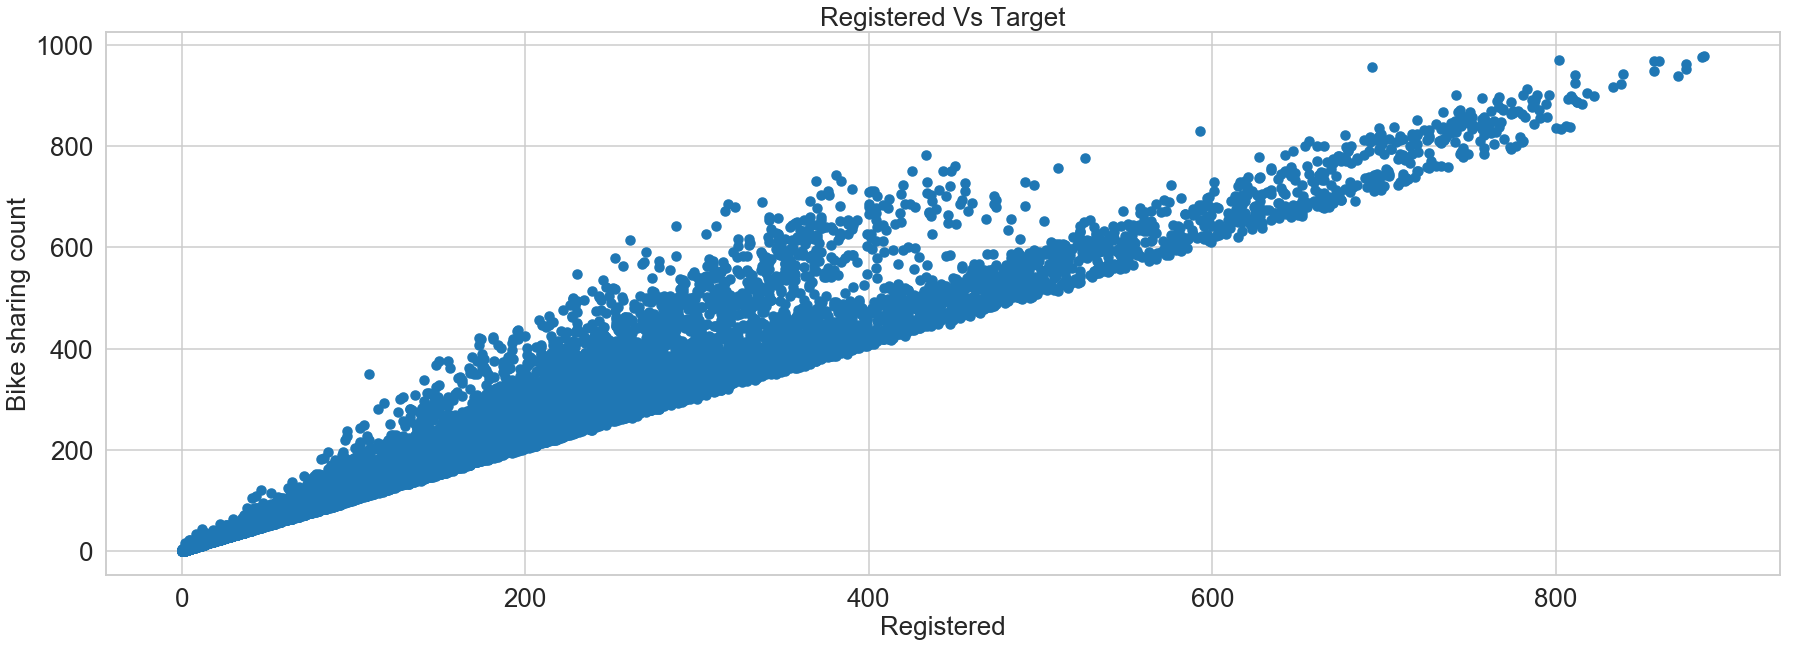

In [85]:
# Registered vs Target
fig, ax = plt.subplots()
ax.scatter(dataset_training[["registered"]], dataset_training[["cnt"]])
plt.title("Registered Vs Target")
ax.set_xlabel("Registered")
ax.set_ylabel("Bike sharing count")
fig.show()

**As we observer from the scattered plots, there is no outliers in various features when we plot it against the Target**

**So, we decide not to take any action in relation to the outliers**

# <font color='blue'>13. Hot Encoding of categorical variables</font>

In this next step we need to reformat the categorical variables into dummies so they can be correctly processed by the models.

First, we identify which feature columns are categorical:

In [19]:
# Algorithms in sklearn cannot work with categorical variables
dataset.select_dtypes(["category"]).columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather'],
      dtype='object')

Second, we use pd.get_dummies to dummify the categorical feature columns:

In [20]:
# Create a new dataframe with only categorical fields from the original dataset
cat_df = dataset.select_dtypes(["category"])

# Then we transform the previously created categorical dataframe to a dummified dataframe
dummies_df = pd.get_dummies(cat_df)

In [21]:
# Setting the id for the dummified dataframe
dummies_df["id"] = dummies_df.index

In [22]:
# Create a new dataframe with only Numerical fields from the original dataset
num_df = dataset.select_dtypes(["float"])

In [23]:
# Setting the id for the Numerical dataframe
num_df["id"] = num_df.index

In [24]:
# merge the two Categorical and Numeric dataframe. This is the dataframe that contains only extranatory features.
clean_df = num_df.join(dummies_df, on="id", how="left", lsuffix="Index2")

Now we can create data frames for the dataset features to be predicted and the dataset features to use for the prediction and join them to create the training dataset.

In [25]:
# Create a dataframe with the fields that we want to predict i.e Target dataframe
toPredict = dataset[["registered", "casual", "cnt"]]

In [26]:
# Let's set id for Target dataframe
toPredict["id"] = toPredict.index

# Let's set id for Feature dataframe
clean_df["id"] = clean_df.index

In [27]:
# Let's join back the TARGET dataframe with Feature dataset to create a final clean dataset
clean_df2 = clean_df.join(toPredict, on="id", how="left", lsuffix="Index2")

In [28]:
# Let's remove the column id
clean_df2 = clean_df2.drop("id", 1)

In [29]:
# Let's see the clean dataframe
clean_df2.head()

# There are still some extra id columns from the merge and join that are done previously.
# We will remove/exclude these columns while building the model.

,temp,hum,windspeed,idIndex2,season_1,season_2,season_3,season_4,year_0,year_1,...,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,idIndex2,registered,casual,cnt
0,0.24,0.81,0.0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,13,3,16
1,0.22,0.80,0.0,1,1,0,0,0,1,0,...,1,0,1,0,0,0,1,32,8,40
2,0.22,0.80,0.0,2,1,0,0,0,1,0,...,1,0,1,0,0,0,2,27,5,32
3,0.24,0.75,0.0,3,1,0,0,0,1,0,...,1,0,1,0,0,0,3,10,3,13
4,0.24,0.75,0.0,4,1,0,0,0,1,0,...,1,0,1,0,0,0,4,1,0,1


# <font color='blue'>14. Models</font>

## <font color='blue'>14.1. Linear Regression Model</font>

The first model we try a simple Linear Regression model, but since we observed (supported by intuition) different trends on weekdays and weekends, we split the dataset into two training sets for each group of days.

### <font color='blue'>14.1.1 Weekdays</font>

Here we train the weekday dataset and obtain our R2 score

In [40]:
# Let's get the data for the working days.
weekdaysDataset = clean_df2
weekdaysDataset1 = weekdaysDataset[weekdaysDataset["workingday_1"] == 1]

# Remove the columns that we don't want for model building
weekdaysDataset2 = weekdaysDataset1.drop(["registered", "idIndex2", "casual"], 1)

In [41]:
# Let's separate the Targer and the features
y = weekdaysDataset2["cnt"]
X = weekdaysDataset2.drop("cnt", 1)

# Let's do the TRAIN and TEST split randomly in 70-30 proportion.
# The splitting is done in this way, just to see how the linear model performs with the data
# Proper splitting will be done when we build the final model that we want to go ahead with.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [42]:
# Build a linear regression model with the TRAIN data
regLR = LinearRegression().fit(X_train, y_train)

# Predict the Target variable for the TEST data using the above model
regPredictions = regLR.predict(X_test)

# Find out the R2 value to evaluate the model
r2_score(y_test, regPredictions)

0.8374014620911546

### <font color='blue'>14.1.2 Weekends</font>

Here we train the weekend dataset and obtain our R2 score.

In [43]:
# Let's get the data for the weekends.
weekdendsDataset = clean_df2
weekendsDataset1 = weekdendsDataset[weekdaysDataset["workingday_0"] == 1]

# Remove the columns that we don't want for model building
weekendsDataset2 = weekendsDataset1.drop(["registered", "idIndex2", "casual"], 1)

In [44]:
# Let's separate the Targer and the features
y = weekendsDataset2["cnt"]
X = weekendsDataset2.drop("cnt", 1)

# Let's do the TRAIN and TEST split randomly in 70-30 proportion.
# The splitting is done in this way, just to see how the linear model performs with the data
# Proper splitting will be done when we build the final model that we want to go ahead with.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [45]:
# Build a linear regression model with the TRAIN data
regLR = LinearRegression().fit(X_train, y_train)

# Predict the Target variable for the TEST data using the above model
regPredictions = regLR.predict(X_test)

# Find out the R2 value to evaluate the model
r2_score(y_test, regPredictions)

0.7808525724412957

After doing the linear regression with a random train/test split, we can see that the r-squared is of 0.83 and 0.79 for Weekdays and Weekends respectively. This will be used as a baseline. The next section will use a time series split as well as XGBoost with Cross Validation to find a better model.

## <font color='blue'>14.2. XGBoost with CV</font>

#### Here we will do the train/test split to make the last quarter of 2012 our test set:

In [46]:
# Find out the TEST data i.e. Last quarter of 2012
test = clean_df2[
    (clean_df2.year_1 == 1)
    & (
        (clean_df2.month_10 == 1)
        | (clean_df2.month_11 == 1)
        | (clean_df2.month_12 == 1)
    )
].drop(["registered", "idIndex2", "casual"], 1)

# Find out the TRAIN data i.e. Whole dataset - TEST dataset
train = clean_df2[: (len(clean_df2) - len(test))].drop(
    ["registered", "idIndex2", "casual"], 1
)

In [47]:
# Separate the Target and the feature variables of the Working day of TRAIN set
y_train_WD = train[train["workingday_1"] == 1]["cnt"]
X_train_WD = train[train["workingday_1"] == 1].drop("cnt", 1)

# Separate the Target and the feature variables of the Working day of TEST set
y_test_WD = test[test["workingday_1"] == 1]["cnt"]
X_test_WD = test[test["workingday_1"] == 1].drop("cnt", 1)

In [49]:
# Separate the Target and the feature variables of the Weekends of TRAIN set
y_train_WE = train[train["workingday_1"] == 0]["cnt"]
X_train_WE = train[train["workingday_1"] == 0].drop("cnt", 1)

# Separate the Target and the feature variables of the Weekends of TEST set
y_test_WE = test[test["workingday_1"] == 0]["cnt"]
X_test_WE = test[test["workingday_1"] == 0].drop("cnt", 1)

### <font color='blue'>14.2.1 Weekdays</font>

We create a machine learning pipeline to construct a grid search for the optimal XGBoost parameters and train the weekday model.

In [48]:
# Create a GradientBoosting model
gbm = GradientBoostingRegressor(learning_rate=0.1, random_state=1234)

# Fit a pipeline with the GB model crated above
pipe = Pipeline([("gbm", gbm)])

# Create cross validation with 10 folds.
cv = TimeSeriesSplit(n_splits=10)

# fit the model with the pipeline, cross validation setting and other grid serach parameters
gbm_cv = GridSearchCV(
    pipe,
    dict(gbm__n_estimators=[1000, 1200, 1400], gbm__max_depth=[2, 3, 4]),
    cv=cv,
    verbose=500,
)

# Now fit the model with the TRAIN data
gbm_cv.fit(X_train_WD, y_train_WD)

# Predict the TEST data traget variable
gbmPredictions_weekdays = gbm_cv.predict(X_test_WD)

# Find out the R2 value to evaluate the model
r2_score(y_test_WD, gbmPredictions_weekdays)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] gbm__max_depth=2, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=2, gbm__n_estimators=1000, score=0.7199036567000558, total=   0.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[CV] gbm__max_depth=2, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=2, gbm__n_estimators=1000, score=0.7807601288845893, total=   0.7s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[CV] gbm__max_depth=2, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=2, gbm__n_estimators=1000, score=0.915230608887457, total=   1.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[CV] gbm__max_depth=2, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=2, gbm__n_estimators=1000, score=0.848264471021909

[CV]  gbm__max_depth=3, gbm__n_estimators=1000, score=0.8590470302083275, total=   3.7s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.0min remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=3, gbm__n_estimators=1000, score=0.5043699782653885, total=   4.8s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.1min remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=3, gbm__n_estimators=1000, score=0.7485545410637617, total=   5.7s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  2.2min remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=3, gbm__n_estimators=1000, score=0.8585990545689454, total=   7.1s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  2.3min remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=3, gbm__n_estimators=10

[CV]  gbm__max_depth=4, gbm__n_estimators=1000, score=0.9540554172439919, total=  16.3s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  6.3min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1200 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=1200, score=0.7149315952000617, total=   1.5s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:  6.3min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1200 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=1200, score=0.7800202001923231, total=   2.8s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  6.3min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1200 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=1200, score=0.9174669387935525, total=   4.4s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:  6.4min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1200 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=12

0.8881335610856431

And here are the optimal parameters:

In [50]:
gbm_cv.best_params_

{'gbm__max_depth': 3, 'gbm__n_estimators': 1400}

### <font color='blue'>14.2.2 Weekends</font>

Similarly, we create a machine learning pipeline to construct a grid search for the optimal XGBoost parameters and train the weekend model.

In [51]:
# Create a GradientBoosting model
gbm = GradientBoostingRegressor(learning_rate=0.1, random_state=1234)

# Fit a pipeline with the GB model crated above
pipe = Pipeline([("gbm", gbm)])

# Create cross validation with 10 folds.
cv = TimeSeriesSplit(n_splits=10)

# fit the model with the pipeline, cross validation setting and other grid serach parameters
gbm_cv = GridSearchCV(
    pipe,
    dict(gbm__n_estimators=[800, 1000, 1200], gbm__max_depth=[2, 3, 4, 5]),
    cv=cv,
    verbose=500,
)

# Now fit the model with the TRAIN data
gbm_cv.fit(X_train_WE, y_train_WE)

# Predict the TEST data traget variable
gbmPredictions_weekends = gbm_cv.predict(X_test_WE)

# Find out the R2 value to evaluate the model
r2_score(y_test_WE, gbmPredictions_weekends)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] gbm__max_depth=2, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=2, gbm__n_estimators=800, score=0.2504376353677573, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] gbm__max_depth=2, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=2, gbm__n_estimators=800, score=0.5798867076721858, total=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[CV] gbm__max_depth=2, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=2, gbm__n_estimators=800, score=0.8197952056261013, total=   0.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[CV] gbm__max_depth=2, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=2, gbm__n_estimators=800, score=0.754095265262869,

[CV]  gbm__max_depth=3, gbm__n_estimators=800, score=0.7597309046225429, total=   1.3s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   45.9s remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=3, gbm__n_estimators=800, score=0.3694644014715711, total=   1.7s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   47.7s remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=3, gbm__n_estimators=800, score=0.7351014143948215, total=   2.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   49.8s remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=3, gbm__n_estimators=800, score=0.803346571975058, total=   2.2s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   52.1s remaining:    0.0s
[CV] gbm__max_depth=3, gbm__n_estimators=800 .........................
[CV]  gbm__max_depth=3, gbm__n_estimators=800, sc

[CV]  gbm__max_depth=4, gbm__n_estimators=800, score=0.8868062225308347, total=   5.3s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.2min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=1000, score=0.19760256698608114, total=   0.5s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:  2.2min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=1000, score=0.5906564864728117, total=   1.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  2.2min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=1000, score=0.6979385447357366, total=   1.5s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:  2.2min remaining:    0.0s
[CV] gbm__max_depth=4, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=4, gbm__n_estimators=10

[CV]  gbm__max_depth=5, gbm__n_estimators=1000, score=0.7652466612120601, total=   3.8s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  4.3min remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=5, gbm__n_estimators=1000, score=0.3707765166429601, total=   4.7s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:  4.4min remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=5, gbm__n_estimators=1000, score=0.646277069455789, total=   5.8s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:  4.5min remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=5, gbm__n_estimators=1000, score=0.8501031251479698, total=   7.5s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  4.6min remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=1000 ........................
[CV]  gbm__max_depth=5, gbm__n_estimators=100

0.8496260974494165

Here are the optimal paramters:

In [52]:
gbm_cv.best_params_

{'gbm__max_depth': 2, 'gbm__n_estimators': 1200}

# <font color='blue'>15. Merge Datasets and find Total Prediction</font>

Now, we can merge the predictions for the weekdays and weekends to get the final predictions and the corresponding R2 score

In [58]:
# Put the predictions for the weekends in a Series
gbmPredictions_weekends_df = pd.Series(
    gbmPredictions_weekends, index=y_test_WE.index.values
)

# Find the predictions for the weekdays in a Series
gbmPredictions_weekdays_df = pd.Series(
    gbmPredictions_weekdays, index=y_test_WD.index.values
)

# Concatenate the Weekends with the weekdays to form the final Series
finalPredictions = pd.concat(
    [gbmPredictions_weekends_df, gbmPredictions_weekdays_df]
).sort_index()

In [55]:
# Put the real values for the weekends in a Series
real_weekends_df = pd.Series(y_test_WE)

# Put the real values for the weekdays in a Series
real_weekdays_df = pd.Series(y_test_WD)

# Concatenate the Weekends with the weekdays to form the final Series
finalReal = pd.concat([real_weekdays_df, real_weekends_df]).sort_index()

In [56]:
# Check the final R2 value for the merged dataset
r2_score(finalReal, finalPredictions)

0.8778238395490948

# <font color='blue'>16. Final Remarks</font>

During the course of this project, our team shared different ideas on how to tackle this problem. We decided to first ran
simple models that fit the prediction for the total bike shared ("cnt"). After some additional dataset analysis through
visualizations, we realised that the behaviour of bikes usage changed significantly depending on the types of days
(weekdays VS weekends). We decided to include this specificity of the business in order to create two separate models
that would predict the bike usage for weekends and weekdays. Finally, we combined the two models to improve the results 
of the model. 


We understood the importance of understanding the importance of understanding the specific business and industry characteristics to be able to create better models with good predictions.


# <font color='blue'>17. PEP8 Compliance</font>

Let's check the code violation (if any).

In [86]:
# Check code quality
!python pycodestylenb.py "Bike_Sharing_Prediction_Final.ipynb"